In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
from datetime import timedelta
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score,recall_score,roc_auc_score,f1_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

pd.set_option('display.max_columns', None)
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False
colors = sns.color_palette('pastel')

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

### 30일

In [3]:
df = pd.read_csv('D:/Section5/ecommerce_project/model/30days_target.csv')
droped_df = pd.read_csv('D:/Section5/ecommerce_project/model/droped_30days_target.csv')

In [4]:
X = df[['total_amount','shipment_fee', 'ADD_TO_CART_COUNT', 'SEARCH_COUNT', 'ADD_PROMO_COUNT',
       'BOOKING_COUNT', 'ITEM_DETAIL_COUNT', 'limit_ship', 'PAGE_VIEW',
       'total_promo']]
y = df['target']
droped_X = droped_df[['total_amount','shipment_fee', 'ADD_TO_CART_COUNT', 'SEARCH_COUNT', 'ADD_PROMO_COUNT',
       'BOOKING_COUNT', 'ITEM_DETAIL_COUNT', 'limit_ship', 'PAGE_VIEW',
       'total_promo']]
droped_y = droped_df['target']

In [5]:
# 이탈 비율을 알기 위한 customer의 마지막 접속 기록 데이터
droped_df.head(5)

,Unnamed: 0,diff,total_amount,shipment_fee,ADD_TO_CART_COUNT,SEARCH_COUNT,ADD_PROMO_COUNT,BOOKING_COUNT,ITEM_DETAIL_COUNT,limit_ship,PAGE_VIEW,total_promo,total_session,target
0,0,NaN,1,0,0,0,0,1.0,0,1,1,0,1.0,0
1,1,NaN,4,0,0,0,0,1.0,0,1,1,0,1.0,0
2,2,NaN,3,1,0,0,0,1.0,0,3,1,0,1.0,0
3,3,NaN,1,0,2,0,1,1.0,2,1,3,4,1.0,0
4,4,NaN,1,2,0,0,0,1.0,0,4,1,0,1.0,0


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=42)

In [7]:
# XGBClassifier 최적 파라미터 적용

model = XGBClassifier(max_depth=7, n_estimators=300, learning_rate =0.1, seed = 42)
model.fit(X_train, y_train)

# 검증 데이터로 예측
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)

# 정확도 계산
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# 각 클래스에 속할 확률 출력
print("Class probabilities:\n{}".format(y_pred_proba))

Accuracy: 94.82%
Class probabilities:
[[0.9887536  0.01124641]
 [0.98788047 0.01211956]
 [0.68402994 0.31597003]
 ...
 [0.97416013 0.02583988]
 [0.9887536  0.01124641]
 [0.97416013 0.02583988]]


In [8]:
# 클래스 고려 X
xgb_acc = accuracy_score(y_val, y_pred)
xgb_precision = precision_score(y_val, y_pred)
xgb_recall = recall_score(y_val, y_pred)
xgb_f1_score = f1_score(y_val, y_pred)

In [9]:
print("XGBoost: 클래스 미고려")
print("Accuracy:", xgb_acc)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1_score)

XGBoost: 클래스 미고려
Accuracy: 0.9481663311895527
Precision: 0.6365280289330922
Recall: 0.06482504604051566
F1 Score: 0.11766672238007689


In [10]:
# 클래스 비율 고려 - 평가지표의 값이 심각하게 낮음.(불균형이 그 원인)

xgb_acc = accuracy_score(y_val, y_pred)
xgb_precision = precision_score(y_val, y_pred, average="weighted")
xgb_recall = recall_score(y_val, y_pred, average="weighted")
xgb_f1_score = f1_score(y_val, y_pred, average="weighted")

In [11]:
print("XGBoost: 클래스 고려")
print("Accuracy:", xgb_acc)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1_score)

XGBoost: 클래스 고려
Accuracy: 0.9481663311895527
Precision: 0.9331615924134918
Recall: 0.9481663311895527
F1 Score: 0.9276797192225317


In [12]:
ratio_30 = y_pred.sum()/len(y_pred)*100

In [13]:
print("30일 이후까지 접속 안하는 세션 비율 :", round(ratio_30,2),"%")

30일 이후까지 접속 안하는 세션 비율 : 0.54 %


In [14]:
# 유저 비율을 구해보자(기존데이터로 예측)
customer_pred = model.predict(droped_X)
last_ratio_30 = customer_pred.sum()/len(customer_pred)*100

In [15]:
print("접속 기록 마지막 세션 이후 30일 접속 안하는 유저 비율 :", round(last_ratio_30,2),"%")

접속 기록 마지막 세션 이후 30일 접속 안하는 유저 비율 : 11.45 %


### 5일 미접속 이탈

In [16]:
df['diff'] = pd.to_timedelta(df['diff'])

In [17]:
# check_df에서 diff칼럼이 30일 이상인 행 추출
mask = df['diff'] > pd.Timedelta(days=5)
# target 열 생성
df['target'] = np.where(mask, 1, 0)

In [18]:
X = df[['total_amount','shipment_fee', 'ADD_TO_CART_COUNT', 'SEARCH_COUNT', 'ADD_PROMO_COUNT',
       'BOOKING_COUNT', 'ITEM_DETAIL_COUNT', 'limit_ship', 'PAGE_VIEW',
       'total_promo']]
y = df['target']

In [19]:
df['target'].value_counts(normalize=True)

target
0    0.777027
1    0.222973
Name: proportion, dtype: float64

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=42)

In [21]:
# XGBClassifier 최적 파라미터 적용

model = XGBClassifier(max_depth=7, n_estimators=300, learning_rate =0.1, seed = 42)
model.fit(X_train, y_train)

# 검증 데이터로 예측
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)

# 정확도 계산
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# 각 클래스에 속할 확률 출력
print("Class probabilities:\n{}".format(y_pred_proba))

Accuracy: 86.06%
Class probabilities:
[[0.8730993  0.12690066]
 [0.877236   0.12276398]
 [0.84461915 0.15538083]
 ...
 [0.877236   0.12276398]
 [0.877236   0.12276398]
 [0.3918652  0.6081348 ]]


In [22]:
# 클래스 고려 X
xgb_acc = accuracy_score(y_val, y_pred)
xgb_precision = precision_score(y_val, y_pred)
xgb_recall = recall_score(y_val, y_pred)
xgb_f1_score = f1_score(y_val, y_pred)

In [23]:
print("XGBoost: 클래스 미고려")
print("Accuracy:", xgb_acc)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1_score)

XGBoost: 클래스 미고려
Accuracy: 0.8606252147871766
Precision: 0.8110608759190757
Recall: 0.48879286618594153
F1 Score: 0.6099775033916643


In [24]:
# 클래스 비율 고려 - 평가지표의 값이 심각하게 낮음.(불균형이 그 원인)

xgb_acc = accuracy_score(y_val, y_pred)
xgb_precision = precision_score(y_val, y_pred, average="weighted")
xgb_recall = recall_score(y_val, y_pred, average="weighted")
xgb_f1_score = f1_score(y_val, y_pred, average="weighted")

In [25]:
print("XGBoost: 클래스 고려")
print("Accuracy:", xgb_acc)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1_score)

XGBoost: 클래스 고려
Accuracy: 0.8606252147871766
Precision: 0.8555522974128278
Recall: 0.8606252147871766
F1 Score: 0.8471064773373143


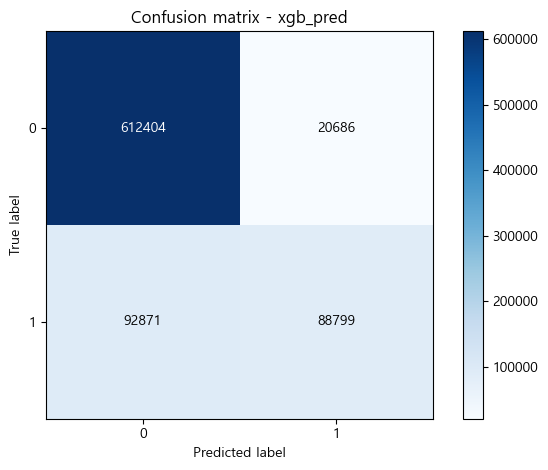

In [26]:
# confusion matrix 계산
cm = confusion_matrix(y_val, y_pred)

# 클래스 레이블 (class label)
classes = np.unique(y_val)

# confusion matrix 시각화
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion matrix - xgb_pred',
       ylabel='True label',
       xlabel='Predicted label')

# 각 칸에 숫자로 라벨링
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()

In [27]:
ratio_5 = y_pred.sum()/len(y_pred)*100

In [28]:
print("5일 이후까지 접속 안하는 세션 비율 :", round(ratio_5,2),"%")

5일 이후까지 접속 안하는 세션 비율 : 13.44 %


In [29]:
# 유저 비율을 구해보자(기존데이터로 예측)
customer_pred = model.predict(droped_X)
last_ratio_5 = customer_pred.sum()/len(customer_pred)*100

In [30]:
print("접속 기록 마지막 세션 이후 5일 접속 안하는 유저 비율 :", round(last_ratio_5,2),"%")

접속 기록 마지막 세션 이후 5일 접속 안하는 유저 비율 : 87.29 %


### 15일(최종)

In [31]:
# check_df에서 diff칼럼이 30일 이상인 행 추출
mask = df['diff'] > pd.Timedelta(days=15)
# target 열 생성
df['target'] = np.where(mask, 1, 0)

In [32]:
X = df[['total_amount','shipment_fee', 'ADD_TO_CART_COUNT', 'SEARCH_COUNT', 'ADD_PROMO_COUNT',
       'BOOKING_COUNT', 'ITEM_DETAIL_COUNT', 'limit_ship', 'PAGE_VIEW',
       'total_promo']]
y = df['target']

In [33]:
df['target'].value_counts(normalize=True)

target
0    0.896573
1    0.103427
Name: proportion, dtype: float64

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, stratify=y_train, random_state=42)

In [35]:
# XGBClassifier 최적 파라미터 적용

model = XGBClassifier(max_depth=7, n_estimators=300, learning_rate =0.1, seed = 42)
model.fit(X_train, y_train)

# 검증 데이터로 예측
y_pred = model.predict(X_val)
y_pred_proba = model.predict_proba(X_val)

# 정확도 계산
accuracy = accuracy_score(y_val, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

# 각 클래스에 속할 확률 출력
print("Class probabilities:\n{}".format(y_pred_proba))

Accuracy: 90.75%
Class probabilities:
[[0.96556276 0.03443721]
 [0.96950644 0.03049356]
 [0.9700757  0.02992424]
 ...
 [0.96556276 0.03443721]
 [0.96556276 0.03443721]
 [0.96611726 0.03388271]]


In [36]:
# 클래스 고려 X
xgb_acc = accuracy_score(y_val, y_pred)
xgb_precision = precision_score(y_val, y_pred)
xgb_recall = recall_score(y_val, y_pred)
xgb_f1_score = f1_score(y_val, y_pred)

In [37]:
print("XGBoost: 클래스 미고려")
print("Accuracy:", xgb_acc)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1_score)

XGBoost: 클래스 미고려
Accuracy: 0.9075310520889587
Precision: 0.5442865929879561
Recall: 0.6510537807946076
F1 Score: 0.5929019917218721


In [38]:
# 클래스 비율 고려 - 평가지표의 값이 심각하게 낮음.(불균형이 그 원인)

xgb_acc = accuracy_score(y_val, y_pred)
xgb_precision = precision_score(y_val, y_pred, average="weighted")
xgb_recall = recall_score(y_val, y_pred, average="weighted")
xgb_f1_score = f1_score(y_val, y_pred, average="weighted")

In [39]:
print("XGBoost: 클래스 고려")
print("Accuracy:", xgb_acc)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1_score)

XGBoost: 클래스 고려
Accuracy: 0.9075310520889587
Precision: 0.9159410667801321
Recall: 0.9075310520889587
F1 Score: 0.9111315948323538


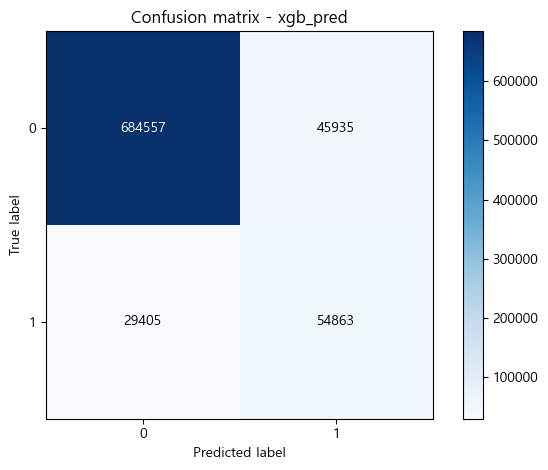

In [40]:
# confusion matrix 계산
cm = confusion_matrix(y_val, y_pred)

# 클래스 레이블 (class label)
classes = np.unique(y_val)

# confusion matrix 시각화
fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       xticklabels=classes, yticklabels=classes,
       title='Confusion matrix - xgb_pred',
       ylabel='True label',
       xlabel='Predicted label')

# 각 칸에 숫자로 라벨링
thresh = cm.max() / 2
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")

fig.tight_layout()
plt.show()

In [41]:
ratio_15 = y_pred.sum()/len(y_pred)*100

In [42]:
print("15일 이후까지 접속 안하는 세션 비율 :", round(ratio_15,2),"%")

15일 이후까지 접속 안하는 세션 비율 : 12.37 %


In [43]:
# 유저 비율을 구해보자(기존데이터로 예측)
customer_pred = model.predict(droped_X)
last_ratio_15 = customer_pred.sum()/len(customer_pred)*100

In [44]:
print("접속 기록 마지막 세션 이후 15일 접속 안하는 유저 비율 :", round(last_ratio_15,2),"%")

접속 기록 마지막 세션 이후 15일 접속 안하는 유저 비율 : 78.34 %


In [45]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
import matplotlib.pyplot as plt

y_pred_proba = model.predict_proba(droped_X)




### X_val, y_val 수정 다른 모델들 정확도 및 평가지표

In [46]:
lr_param_grid = {'C': [1]}
knn_param_grid = {'n_neighbors': [7]}
dt_param_grid = {'max_depth': [7]}
rf_param_grid = {'max_depth': [7], 'n_estimators': [300]}
xgb_param_grid = {'learning_rate': [0.1], 'max_depth': [7], 'n_estimators': [300]}
cat_param_grid = {'depth': [7], 'iterations': [300], 'learning_rate': [0.1]}

In [47]:
lr_gs = LogisticRegression(C=1)
lr_gs.fit(X_train, y_train)
lr_pred = lr_gs.predict(X_val)

In [ ]:
knn_gs = GridSearchCV(KNeighborsClassifier(), knn_param_grid)
knn_gs.fit(X_train, y_train)
knn_pred = knn_gs.predict(X_val)

In [ ]:
dt_gs = DecisionTreeClassifier(max_depth= 7)
dt_gs.fit(X_train, y_train)
dt_pred = dt_gs.predict(X_val)

DecisionTreeClassifier(max_depth=7)

In [ ]:
rf_gs = RandomForestClassifier(max_depth= 7, n_estimators = 300)
rf_gs.fit(X_train, y_train)
rf_pred = rf_gs.predict(X_val)

RandomForestClassifier(max_depth=7, n_estimators=300)

In [ ]:
xgb_gs = XGBClassifier(learning_rate = 0.1, max_depth = 7, n_estimators = 300)
xgb_gs.fit(X_train, y_train)
xgb_pred = xgb_gs.predict(X_val)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=300, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
cat_gs = GridSearchCV(CatBoostClassifier(verbose=0), cat_param_grid)
cat_gs.fit(X_train, y_train)
cat_gs.fit(X_train, y_train)
cat_pred = cat_gs.predict(X_val)

0:	learn: 0.5739970	total: 360ms	remaining: 1m 47s
1:	learn: 0.4857491	total: 569ms	remaining: 1m 24s
2:	learn: 0.4211384	total: 795ms	remaining: 1m 18s
3:	learn: 0.3729395	total: 1.03s	remaining: 1m 15s
4:	learn: 0.3376766	total: 1.25s	remaining: 1m 13s
5:	learn: 0.3114387	total: 1.47s	remaining: 1m 11s
6:	learn: 0.2920732	total: 1.65s	remaining: 1m 8s
7:	learn: 0.2772597	total: 1.85s	remaining: 1m 7s
8:	learn: 0.2662627	total: 2.04s	remaining: 1m 6s
9:	learn: 0.2577804	total: 2.26s	remaining: 1m 5s
10:	learn: 0.2511340	total: 2.52s	remaining: 1m 6s
11:	learn: 0.2463089	total: 2.7s	remaining: 1m 4s
12:	learn: 0.2424145	total: 2.9s	remaining: 1m 4s
13:	learn: 0.2395237	total: 3.13s	remaining: 1m 3s
14:	learn: 0.2370361	total: 3.34s	remaining: 1m 3s
15:	learn: 0.2351515	total: 3.55s	remaining: 1m 3s
16:	learn: 0.2335475	total: 3.78s	remaining: 1m 2s
17:	learn: 0.2324176	total: 4s	remaining: 1m 2s
18:	learn: 0.2314867	total: 4.21s	remaining: 1m 2s
19:	learn: 0.2307496	total: 4.45s	remain

In [ ]:
# 각 모델의 성능 평가 지표 계산
lr_acc = accuracy_score(y_val, lr_pred)
lr_precision = precision_score(y_val, lr_pred)
lr_recall = recall_score(y_val, lr_pred)
lr_f1_score = f1_score(y_val, lr_pred)

knn_acc = accuracy_score(y_val, knn_pred)
knn_precision = precision_score(y_val, knn_pred)
knn_recall = recall_score(y_val, knn_pred)
knn_f1_score = f1_score(y_val, knn_pred)

dt_acc = accuracy_score(y_val, dt_pred)
dt_precision = precision_score(y_val, dt_pred)
dt_recall = recall_score(y_val, dt_pred)
dt_f1_score = f1_score(y_val, dt_pred)

rf_acc = accuracy_score(y_val, rf_pred)
rf_precision = precision_score(y_val, rf_pred)
rf_recall = recall_score(y_val, rf_pred)
rf_f1_score = f1_score(y_val, rf_pred)

xgb_acc = accuracy_score(y_val, xgb_pred)
xgb_precision = precision_score(y_val, xgb_pred)
xgb_recall = recall_score(y_val, xgb_pred)
xgb_f1_score = f1_score(y_val, xgb_pred)

cat_acc = accuracy_score(y_val, cat_pred)
cat_precision = precision_score(y_val, cat_pred)
cat_recall = recall_score(y_val, cat_pred)
cat_f1_score = f1_score(y_val, cat_pred)

In [ ]:
# 가중치 고려X 평가 지표
# 결과 출력
print("Logistic Regression:")
print("Accuracy:", lr_acc)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1_score)

print("K-Nearest Neighbors:")
print("Accuracy:", knn_acc)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1_score)

print("Decision Tree:")
print("Accuracy:", dt_acc)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1_score)

print("Random Forest:")
print("Accuracy:", rf_acc)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1_score)

print("XGBoost:")
print("Accuracy:", xgb_acc)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1_score)

print("CatBoost:")
print("Accuracy:", cat_acc)
print("Precision:", cat_precision)
print("Recall:", cat_recall)
print("F1 Score:", cat_f1_score)

In [ ]:
# 각 모델의 성능 평가 지표 계산
lr_acc = accuracy_score(y_val, lr_pred)
lr_precision = precision_score(y_val, lr_pred, average="weighted")
lr_recall = recall_score(y_val, lr_pred, average="weighted")
lr_f1_score = f1_score(y_val, lr_pred, average="weighted")

knn_acc = accuracy_score(y_val, knn_pred)
knn_precision = precision_score(y_val, knn_pred, average="weighted")
knn_recall = recall_score(y_val, knn_pred, average="weighted")
knn_f1_score = f1_score(y_val, knn_pred, average="weighted")

dt_acc = accuracy_score(y_val, dt_pred)
dt_precision = precision_score(y_val, dt_pred, average="weighted")
dt_recall = recall_score(y_val, dt_pred, average="weighted")
dt_f1_score = f1_score(y_val, dt_pred, average="weighted")

rf_acc = accuracy_score(y_val, rf_pred)
rf_precision = precision_score(y_val, rf_pred, average="weighted")
rf_recall = recall_score(y_val, rf_pred, average="weighted")
rf_f1_score = f1_score(y_val, rf_pred, average="weighted")

xgb_acc = accuracy_score(y_val, xgb_pred)
xgb_precision = precision_score(y_val, xgb_pred, average="weighted")
xgb_recall = recall_score(y_val, xgb_pred, average="weighted")
xgb_f1_score = f1_score(y_val, xgb_pred, average="weighted")

cat_acc = accuracy_score(y_val, cat_pred)
cat_precision = precision_score(y_val, cat_pred, average="weighted")
cat_recall = recall_score(y_val, cat_pred, average="weighted")
cat_f1_score = f1_score(y_val, cat_pred, average="weighted")
# 가중치 고려O 평가 지표
# 결과 출력
print("Logistic Regression:")
print("Accuracy:", lr_acc)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1_score)

print("K-Nearest Neighbors:")
print("Accuracy:", knn_acc)
print("Precision:", knn_precision)
print("Recall:", knn_recall)
print("F1 Score:", knn_f1_score)

print("Decision Tree:")
print("Accuracy:", dt_acc)
print("Precision:", dt_precision)
print("Recall:", dt_recall)
print("F1 Score:", dt_f1_score)

print("Random Forest:")
print("Accuracy:", rf_acc)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1_score)

print("XGBoost:")
print("Accuracy:", xgb_acc)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1_score)

print("CatBoost:")
print("Accuracy:", cat_acc)
print("Precision:", cat_precision)
print("Recall:", cat_recall)
print("F1 Score:", cat_f1_score)

In [ ]:
# 각 모델에서 예측 결과를 저장
lr_pred = lr_gs.predict(X_val)
knn_pred = knn_gs.predict(X_val)
dt_pred = dt_gs.predict(X_val)
rf_pred = rf_gs.predict(X_val)
xgb_pred = xgb_gs.predict(X_val)
cat_pred = cat_gs.predict(X_val)

# confusion matrix 계산
lr_cm = confusion_matrix(y_val, lr_pred)
knn_cm = confusion_matrix(y_val, knn_pred)
dt_cm = confusion_matrix(y_val, dt_pred)
rf_cm = confusion_matrix(y_val, rf_pred)
xgb_cm = confusion_matrix(y_val, xgb_pred)
cat_cm = confusion_matrix(y_val, cat_pred)

# 클래스 레이블 (class label)
classes = np.unique(y_val)

# confusion matrix 시각화
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

axs[0, 0].imshow(lr_cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[0, 0].set(title='Confusion matrix - Logistic Regression',
               xticks=np.arange(lr_cm.shape[1]),
               yticks=np.arange(lr_cm.shape[0]),
               xticklabels=classes, yticklabels=classes,
               ylabel='True label',
               xlabel='Predicted label')
thresh = lr_cm.max() / 2
for i in range(lr_cm.shape[0]):
    for j in range(lr_cm.shape[1]):
        axs[0, 0].text(j, i, format(lr_cm[i, j], 'd'),
                       ha="center", va="center",
                       color="white" if lr_cm[i, j] > thresh else "black")

axs[0, 1].imshow(knn_cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[0, 1].set(title='Confusion matrix - KNN',
               xticks=np.arange(knn_cm.shape[1]),
               yticks=np.arange(knn_cm.shape[0]),
               xticklabels=classes, yticklabels=classes,
               ylabel='True label',
               xlabel='Predicted label')
thresh = knn_cm.max() / 2
for i in range(knn_cm.shape[0]):
    for j in range(knn_cm.shape[1]):
        axs[0, 1].text(j, i, format(knn_cm[i, j], 'd'),
                       ha="center", va="center",
                       color="white" if knn_cm[i, j] > thresh else "black")

axs[0, 2].imshow(dt_cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[0, 2].set(title='Confusion matrix - Decision Tree',
               xticks=np.arange(dt_cm.shape[1]),
               yticks=np.arange(dt_cm.shape[0]),
               xticklabels=classes, yticklabels=classes,
               ylabel='True label',
               xlabel='Predicted label')
thresh = dt_cm.max() / 2
for i in range(dt_cm.shape[0]):
    for j in range(dt_cm.shape[1]):
        axs[0, 2].text(j, i, format(dt_cm[i, j], 'd'),
                       ha="center", va="center",
                       color="white" if dt_cm[i, j] > thresh else "black")

axs[1, 0].imshow(rf_cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[1, 0].set(title='Confusion matrix - Random Forest',
               xticks=np.arange(rf_cm.shape[1]),
               yticks=np.arange(rf_cm.shape[0]),
               xticklabels=classes, yticklabels=classes,
               ylabel='True label',
               xlabel='Predicted label')
thresh = rf_cm.max() / 2
for i in range(rf_cm.shape[0]):
    for j in range(rf_cm.shape[1]):
        axs[1, 0].text(j, i, format(rf_cm[i, j], 'd'),
                       ha="center", va="center",
                       color="white" if rf_cm[i, j] > thresh else "black")

axs[1, 1].imshow(xgb_cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[1, 1].set(title='Confusion matrix - XGBoost',
               xticks=np.arange(xgb_cm.shape[1]),
               yticks=np.arange(xgb_cm.shape[0]),
               xticklabels=classes, yticklabels=classes,
               ylabel='True label',
               xlabel='Predicted label')
thresh = xgb_cm.max() / 2
for i in range(xgb_cm.shape[0]):
    for j in range(xgb_cm.shape[1]):
        axs[1, 1].text(j, i, format(xgb_cm[i, j], 'd'),
                       ha="center", va="center",
                       color="white" if xgb_cm[i, j] > thresh else "black")

axs[1, 2].imshow(cat_cm, interpolation='nearest', cmap=plt.cm.Blues)
axs[1, 2].set(title='Confusion matrix - CatBoost',
               xticks=np.arange(cat_cm.shape[1]),
               yticks=np.arange(cat_cm.shape[0]),
               xticklabels=classes, yticklabels=classes,
               ylabel='True label',
               xlabel='Predicted label')
thresh = cat_cm.max() / 2
for i in range(cat_cm.shape[0]):
    for j in range(cat_cm.shape[1]):
        axs[1, 2].text(j, i, format(cat_cm[i, j], 'd'),
                       ha="center", va="center",
                       color="white" if cat_cm[i, j] > thresh else "black")

plt.show()